<a href="https://colab.research.google.com/github/ChubVV/mathpracticum-/blob/hometask4/Hometask_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

Найдем зависимость задержек от месяца в каждом из аэропортов.

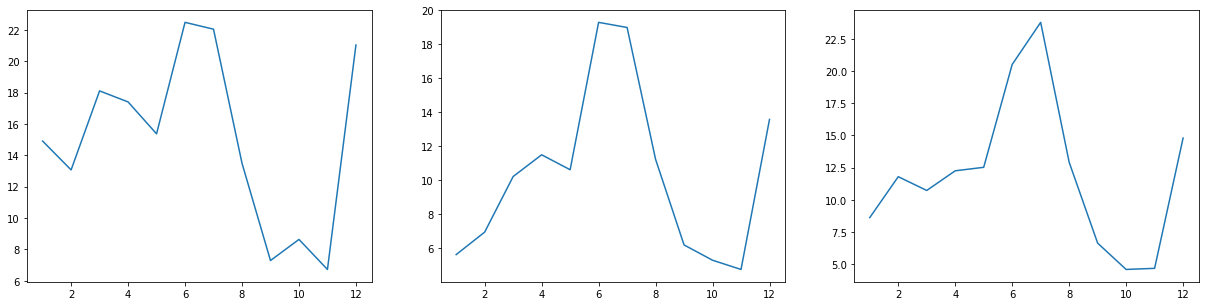

In [2]:
EWR = flights[flights['origin'] == 'EWR']
LGA = flights[flights['origin'] == 'LGA']
JFK = flights[flights['origin'] == 'JFK']
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
plt.setp(ax, xticks=np.arange(0, 14, 2))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('month')['dep_delay'].mean())
plt.show()

Вывод: Среднее время задержки рейса во всех аэропортах увеличивается в период каникул и праздников - летний период и декабрь. Руководству стоит нанимать временных работников на это время, например.

Изучим зависимость среднего времени задержки вылета от времени суток в каждом аэропорту.

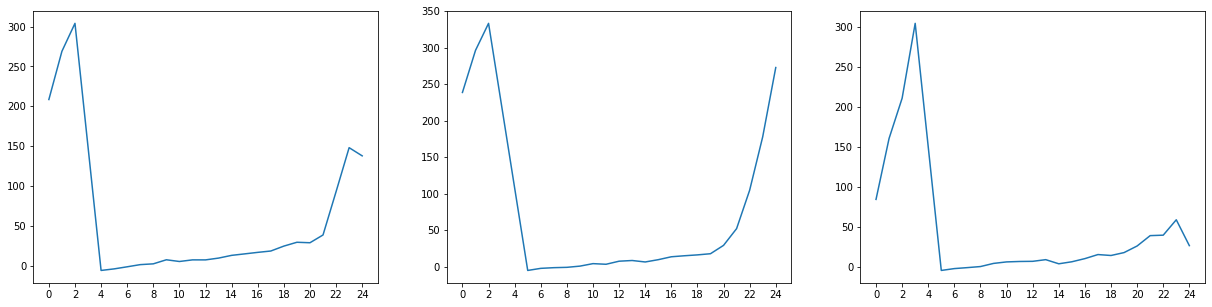

In [3]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
plt.setp(ax, xticks=np.arange(0, 25, 2))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('hour')['dep_delay'].mean())
plt.show()

Вывод: зависимость от времени суток есть. Ночью, когда частота задержек резко повышается, необходимо наладить работу аэропорта. Возможно, необходимо улучшить освещение на взлетно-посадочной полосе или привлекать к работе больше сотрудников.

Изобразим задержки в зависимости от аэропорта

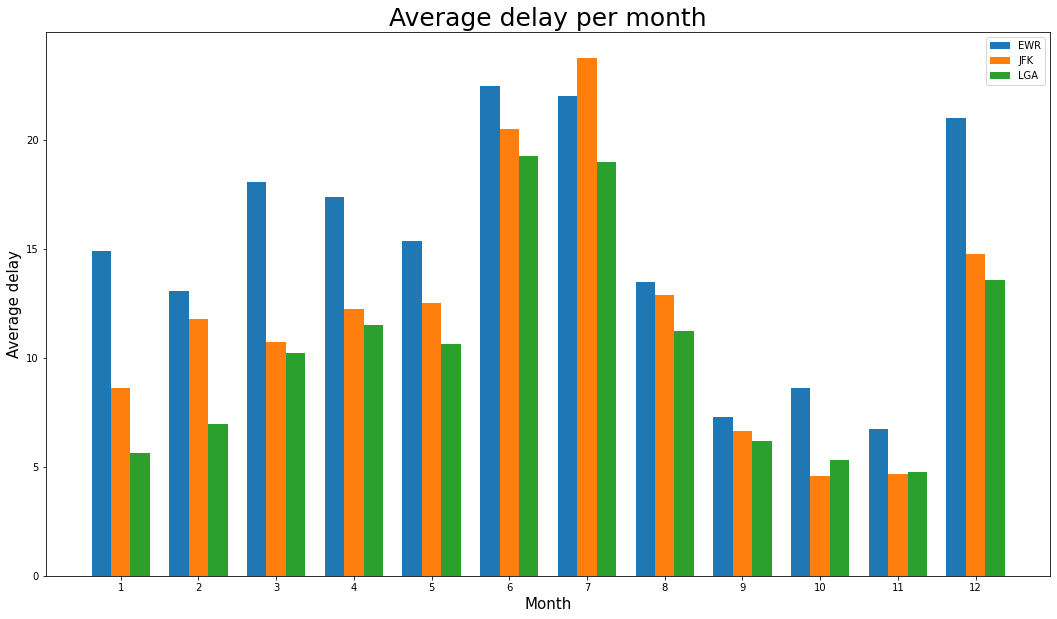

In [4]:
EWRm = flights[flights.origin == 'EWR'].groupby('month')['dep_delay'].mean()
JFKm = flights[flights.origin == 'JFK'].groupby('month')['dep_delay'].mean()
LGAm = flights[flights.origin == 'LGA'].groupby('month')['dep_delay'].mean()
plt.figure(figsize=(18,10))
width = 0.25
plt.bar(EWRm.index, EWRm, width, label='EWR')
plt.bar(JFKm.index + width, JFKm, width, label='JFK')
plt.bar(LGAm.index + 2*width, LGAm, width, label='LGA')
plt.xticks(EWRm.index + width, EWRm.index)
plt.xlabel('Month', size=15)
plt.ylabel('Average delay', size=15)
plt.title('Average delay per month', size=25)
plt.legend(loc='upper right')
plt.show()

Вывод: Можно предложить администрации равномернее распределить поток вылетов, что позволит "выровнять" этот график. В частности, поможет частичный перенос нагрузки с EWR на LGA.

Зависимость от скорости ветра.

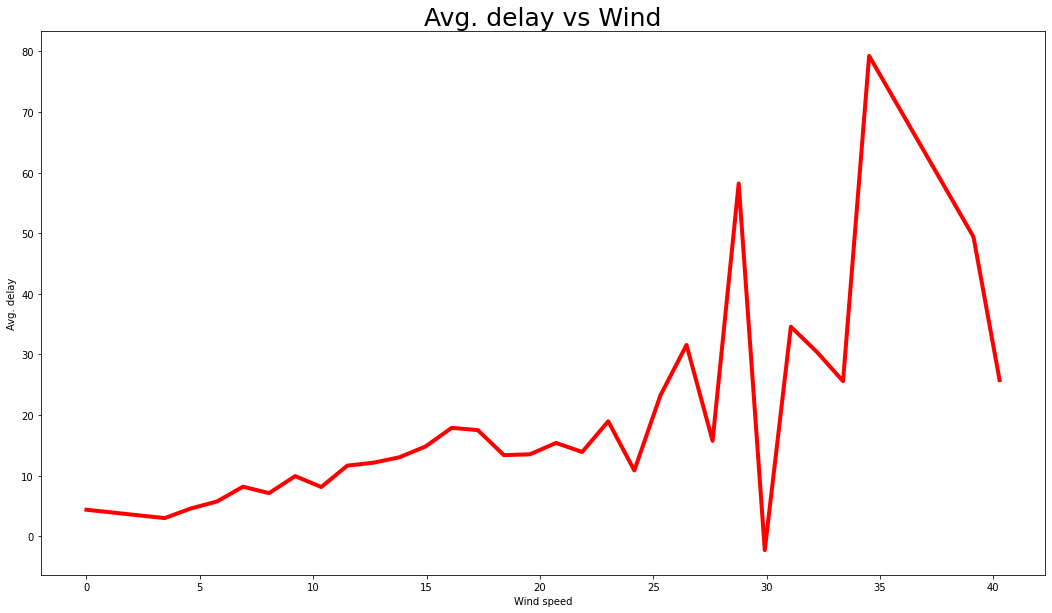

In [5]:
flight_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.figure(figsize=(18,10))
wind_speed_del = pd.DataFrame(flight_weather.groupby('wind_speed')['arr_delay'].mean())
wind_speed_del.sort_index()
wind_speed_del = wind_speed_del.drop(labels=[wind_speed_del.index[-1]])
plt.plot(wind_speed_del.index, wind_speed_del, c= 'r', linewidth=4)
plt.xlabel('Wind speed')
plt.ylabel('Avg. delay')
plt.title('Avg. delay vs Wind', size =25)
plt.show()